In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Introduction

In this experiment, we measure the interference pattern of single and double slits using both intense and weak light sources (i.e. a laser and a dim green-filtered bulb, respectively). The bulb source is made sufficiently weak such that only one photon passes through the slit apparatus at a time. We show that both diffraction patterns fit the classical diffraction model for single-slit and double-slit diffraction.

### Background and Methods

The nature of light has fascinated physicists since antiquity. One can easily observe the wave-like nature of light by passing a beam of light through two narrowly separated slits and observing the resulting double-slit diffraction pattern. Light waves are also well-understood in the context of classical electromagnetism, where Maxwell's equations accurately describe the wave-like nature of light. However, the discovery of the photoelectric effect implies that light consists of quanta (particles called "photons") which interact with other types of matter. With the advent of quantum theory, it is now understood that light (like other matter) behaves both as a particle and as a wave. Even a single photon (a particle) is best though of as a probability wave that will interfere with itself when passed through a double-slit apparatus. Hence, classical wave-theory diffraction models can accurately describe the interference patterns of both classical light sources (such as a laser) and single photons.

One such classical wave-diffraction model is the Fraunhofer diffraction model, named after 19th-century optical physicist Joseph von Fraunhofer. As described in the Teach Spin Lab Manual, the Fraunhofer diffraction intensity model assumes that (1) light acts as a plane wave emmitted from an infinitely far point source and (2) the resulting pattern is measured on a surface orthogonal to and sufficiently far away from the diffraction grating. For a wave passing through a double-slit, the intensity pattern as a function of the angle $\theta$ from the center of the diffraction grating is

$$I(\theta) = I_0(\cos{\beta})^2(\frac{\sin{\alpha}}{\alpha})^2,$$

where $$\alpha = \frac{\pi a}{\lambda}\sin{\theta}$$ and $$\beta = \frac{\pi d}{\lambda}\sin{\theta}.$$ The following are also present in the above model:
* $I_0$, the height of the central intensity maxima;
* $a$, the slit width;
* $d$, the center-to-center separation of the slits;
* $\lambda$, the wavelength of the wave.

For single-slit diffraction, the model remains the same, but $d = 0 \implies \beta = 0 \implies (\cos{\beta})^2 = 1$ since there is only one slit.


In our experiment, we put the wave-like nature of light to the test by measuring the interference pattern of single and double slits using both intense and weak light sources. We use a red laser ($\lambda = 0.670 \pm 0.005 \text{μm}$) for our classical light source and a low-powered green-filtered bulb ($\lambda \in [0.541,0.551] \text{μm}$)

In [ ]:
# import laser diffraction data

dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/two-slit/data/laser-runs/'
files = [
    'far_no_slit.csv',
    'far_slit.csv',
    'both_slit.csv',
    'near_slit.csv',
    'near_no_slit.csv'
]

pos = []
v1 = []
v2 = []
v3 = []
for i in range(len(files)):
    posh, v1h, v2h, v3h = np.genfromtxt(
        dirpath + files[i], unpack=True,
        skip_header=1, dtype=float,
        delimiter=','
    )
    pos.append(posh)
    v1.append(v1h)
    v2.append(v2h)
    v3.append(v3h)

pos = np.array(pos, dtype=object)
v1 = np.array(v1, dtype=object)
v2 = np.array(v2, dtype=object)
v3 = np.array(v3, dtype=object)

nlength = len(pos)

# also make pos in m instead of mm
pos = np.array([
    pos[i]/1000 for i in range(nlength)
], dtype=object)

In [ ]:
# avg v
vavg = np.array([
    (v1[i] + v2[i] + v3[i])/3
    for i in range(nlength)
], dtype=object)

# std v, which we use later for error bars
vstd = np.array([
    np.array([
        np.std(
            np.array([v1[j][i],v2[j][i],v3[j][i]])
        )
        for i in range(len(v1[j]))
    ])
    for j in range(nlength)
], dtype=object)

In [ ]:
# notice that there are several instances where 
# all three measurements are the same,
# i.e. vstd = 0. but this does not mean that 
# there was no error in the measurement.
# for our error bars, we will need to replace 
# the 0-valued data with half of
# the value of the last digit on our measuring device. 
# the voltmeter could measure
# up to the thousandths place (e.g. 1.969V), 
# so there is a measurement error of
# +/- 0.0005V. 

verr = np.array([
    np.array([
        vstd[j][i]
        if vstd[j][i] != 0
        else 0.0005
        for i in range(len(vstd[j]))
    ])
    for j in range(nlength)
], dtype=object)

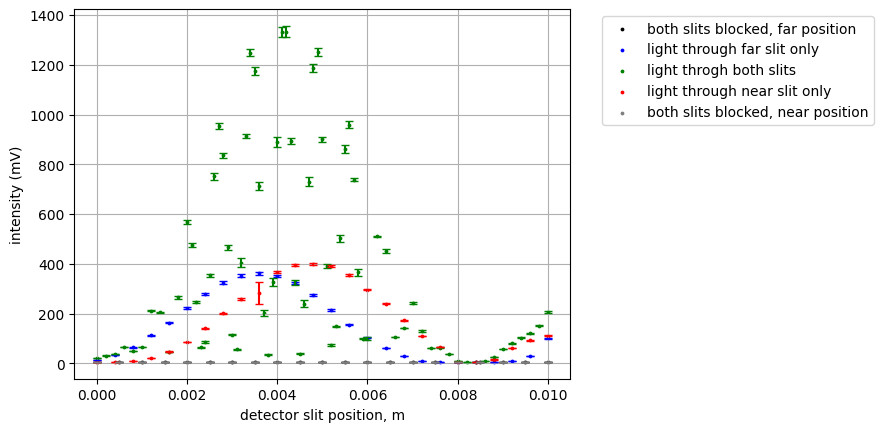

In [ ]:
# plotting the laser data with error bars

labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], vavg[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], vavg[i], yerr=verr[i],
        color=colors[i],
        ls='none',
        capsize=3
    )

plt.xlabel('detector slit position, m')
plt.ylabel('intensity (mV)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# fit function

# two-slit fraunhoffer model
def ts_fcn(x, i0, d, a, l, wavelength, phi, bg):
    beta = ((np.pi * d)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    alpha = ((np.pi * a)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    return i0 * (np.cos(beta)**2 * (np.sin(alpha)/alpha)**2) + bg

# one-slit fraunhoffer model
def os_fcn(x, i0, a, l, wavelength, phi, bg):
    delta = (2 * np.pi * a * np.sin(np.arctan2(x, l) + phi)/wavelength)
    return i0 * ((np.sin(delta/2.0)**2)/(delta/2.0)**2) + bg

In [ ]:
# fit the far slit one-slit diffraction pattern 
# (i.e. slit blocker at 4.2mm)
i0 = 400
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.0088
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osf_laser, pcov_osf_laser = curve_fit(os_fcn, pos[1], vavg[1], p0=guess, maxfev=100000)

# fit the two-slit diffraction pattern
# (i.e. slit blocker at 5mm)
i0 = 1600
d = 0.353e-3
a = 0.085e-3
l = 0.5
wavelength = 0.600e-6
phi = -0.0085
bg = 0.1
guess = np.array([i0, d, a, l, wavelength, phi, bg])

popt_ts_laser, pcov_ts_laser = curve_fit(ts_fcn, pos[2], vavg[2], p0=guess, maxfev=100000)

# fit the near slit one-slit diffraction pattern
# (i.e. slit blocker at 6mm)
i0 = 350
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.008
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osn_laser, pcov_osn_laser = curve_fit(os_fcn, pos[3], vavg[3], p0=guess, maxfev=100000)

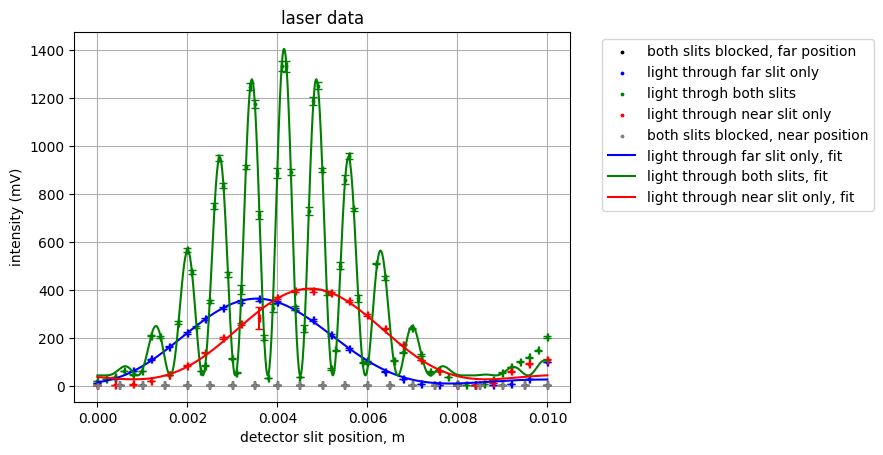

In [ ]:
labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], vavg[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], vavg[i],
        yerr=verr[i], xerr=0.00001,
        color=colors[i],
        ls='none',
        capsize=3
    )

x = np.linspace(0,0.01,1000)
plt.plot(
    x, os_fcn(x, *popt_osf_laser),
    color='blue',
    label='light through far slit only, fit'
)
plt.plot(
    x, ts_fcn(x, *popt_ts_laser),
    color='green',
    label='light through both slits, fit'
)
plt.plot(
    x, os_fcn(x, *popt_osn_laser),
    color='red',
    label='light through near slit only, fit'
)

plt.title('laser data')
plt.xlabel('detector slit position, m')
plt.ylabel('intensity (mV)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# import bulb diffraction data. position is the same for this data

dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/two-slit/data/bulb-runs/'
files = [
    'far_no_slit.csv',
    'far_slit.csv',
    'both_slit.csv',
    'near_slit.csv',
    'near_no_slit.csv'
]

counts1 = []
counts2 = []
counts3 = []
for i in range(len(files)):
    junk, counts1h, counts2h, counts3h = np.genfromtxt(
        dirpath + files[i], unpack=True,
        skip_header=1, dtype=float,
        delimiter=','
    )
    counts1.append(counts1h)
    counts2.append(counts2h)
    counts3.append(counts3h)

counts1 = np.array(counts1, dtype=object)
counts2 = np.array(counts2, dtype=object)
counts3 = np.array(counts3, dtype=object)

In [ ]:
# for counting experiments, the error is 
# the square root of the number of counts.
# we can sum the total counts for each position
# and then take the square root of this number
# yeah

# the total number of counts
counts = np.array([
    counts1[i] + counts2[i] + counts3[i]
    for i in range(nlength)
], dtype=object)

# the error, i.e. the square root of
# the number of counts at each position
counts_err = np.array([
    np.array([
        np.sqrt(counts[j][i])
        for i in range(len(counts[j]))
    ])
    for j in range(nlength)
], dtype=object)

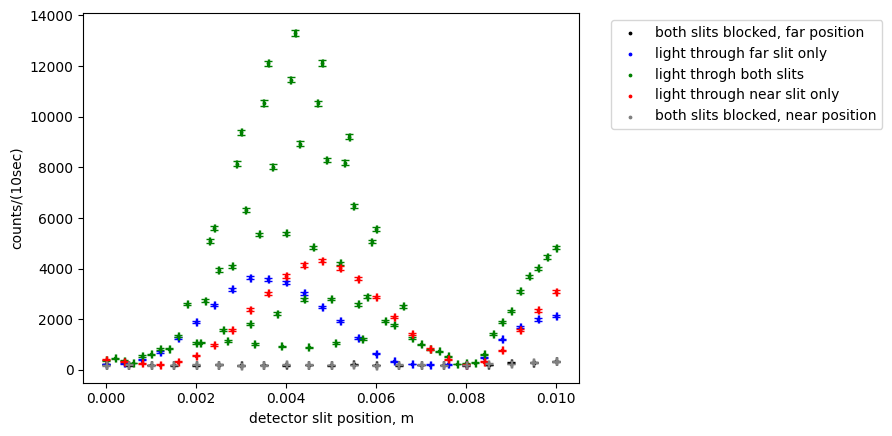

In [ ]:
# plotting the bulb data with error bars

labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], counts[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], counts[i],
        yerr=counts_err[i], xerr=0.00001,
        color=colors[i],
        ls='none',
        capsize=3
    )

plt.xlabel('detector slit position, m')
plt.ylabel('counts/(10sec)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# the fit functions are the same as 
# the ones define above for the laser patterns.
# so lets try to fit these mofos.
# we will ignore the data past pos = 0.8 since its kinda bad

# fit the far slit one-slit diffraction pattern
i0 = 4000
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.0088
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osf_bulb, pcov_osf_bulb = curve_fit(os_fcn, pos[1][0:21], counts[1][0:21], p0=guess, maxfev=100000)

# fit the two-slit diffraction pattern
i0 = 14000
d = 1.44522093e-05
a = 2.49249214e-06
l = 2.10394743e+00
wavelength = 4.46560986e-09
phi = -1.97169094e-03
bg = 0.1
guess = np.array([i0, d, a, l, wavelength, phi, bg])

popt_ts_bulb, pcov_ts_bulb = curve_fit(ts_fcn, pos[2][0:61], counts[2][0:61], p0=guess, maxfev=100000)

# fit the near slit one-slit diffraction pattern
i0 = 4000
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.008
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osn_bulb, pcov_osn_bulb = curve_fit(os_fcn, pos[3][0:21], counts[3][0:21], p0=guess, maxfev=100000)

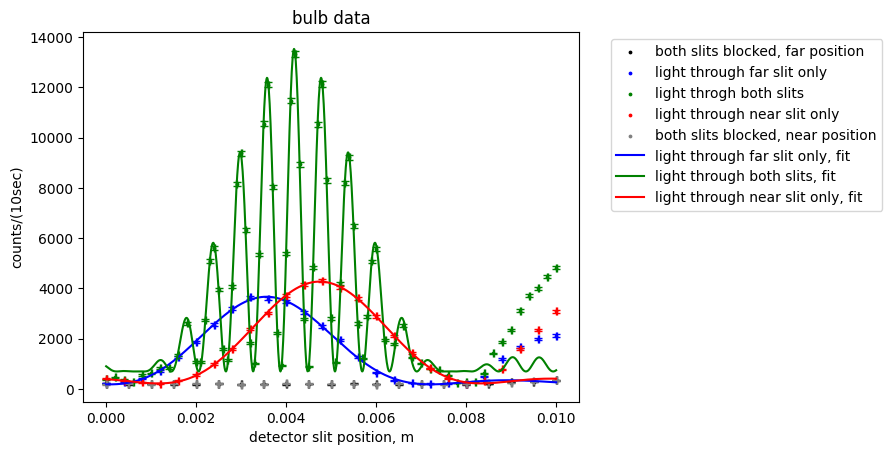

In [ ]:
labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], counts[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], counts[i], 
        yerr=counts_err[i], xerr=0.00001,
        color=colors[i],
        ls='none',
        capsize=3
    )

x = np.linspace(0,0.01,1000)
plt.plot(
    x, os_fcn(x, *popt_osf_bulb),
    color='blue',
    label='light through far slit only, fit'
)
plt.plot(
    x, ts_fcn(x, *popt_ts_bulb),
    color='green',
    label='light through both slits, fit'
)
plt.plot(
    x, os_fcn(x, *popt_osn_bulb),
    color='red',
    label='light through near slit only, fit'
)

plt.title('bulb data')
plt.xlabel('detector slit position, m')
plt.ylabel('counts/(10sec)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In conclusion we are the GOATs